In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt



In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anvesh Bajirao\OneDrive\Groceries_dataset.csv\Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df = df.dropna()
df['itemDescription'] = df['itemDescription'].str.strip()


In [4]:
transactions = df.groupby('Member_number')['itemDescription'].apply(list)
transactions.head()


Member_number
1000    [soda, canned beer, sausage, sausage, whole mi...
1001    [frankfurter, frankfurter, beef, sausage, whol...
1002    [tropical fruit, butter milk, butter, frozen v...
1003    [sausage, root vegetables, rolls/buns, deterge...
1004    [other vegetables, pip fruit, root vegetables,...
Name: itemDescription, dtype: object

In [5]:
total_transactions = len(transactions)

item_counts = {}

for items in transactions:
    for item in set(items):
        item_counts[item] = item_counts.get(item, 0) + 1

item_support = {
    item: count / total_transactions
    for item, count in item_counts.items()
}

item_support_df = pd.DataFrame(
    item_support.items(),
    columns=['Item', 'Support']
).sort_values(by='Support', ascending=False)

item_support_df.head(10)


,Item,Support
5,whole milk,0.458184
20,other vegetables,0.376603
11,rolls/buns,0.349666
10,soda,0.313494
2,yogurt,0.282966
17,tropical fruit,0.233710
25,root vegetables,0.230631
37,bottled water,0.213699
7,sausage,0.206003
63,citrus fruit,0.185480


In [6]:
pair_counts = {}

for items in transactions:
    for pair in itertools.combinations(set(items), 2):
        pair = tuple(sorted(pair))
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

pair_support = {
    pair: count / total_transactions
    for pair, count in pair_counts.items()
}

pair_support_df = pd.DataFrame(
    pair_support.items(),
    columns=['Item_Pair', 'Support']
).sort_values(by='Support', ascending=False)

pair_support_df.head(10)


,Item_Pair,Support
106,"(other vegetables, whole milk)",0.191380
58,"(rolls/buns, whole milk)",0.178553
44,"(soda, whole milk)",0.151103
21,"(whole milk, yogurt)",0.150590
207,"(other vegetables, rolls/buns)",0.146742
705,"(other vegetables, soda)",0.124166
455,"(other vegetables, yogurt)",0.120318
62,"(rolls/buns, soda)",0.119805
91,"(tropical fruit, whole milk)",0.116470
194,"(root vegetables, whole milk)",0.113135


In [7]:
rules = []

for (item_A, item_B), support_AB in pair_support.items():
    support_A = item_support[item_A]
    support_B = item_support[item_B]

    confidence_A_B = support_AB / support_A
    confidence_B_A = support_AB / support_B

    lift_A_B = confidence_A_B / support_B
    lift_B_A = confidence_B_A / support_A

    rules.append([item_A, item_B, support_AB, confidence_A_B, lift_A_B])
    rules.append([item_B, item_A, support_AB, confidence_B_A, lift_B_A])

rules_df = pd.DataFrame(
    rules,
    columns=['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift']
)

rules_df.head()


,Antecedent,Consequent,Support,Confidence,Lift
0,canned beer,misc. beverages,0.013084,0.079193,1.342142
1,misc. beverages,canned beer,0.013084,0.221739,1.342142
2,canned beer,yogurt,0.051821,0.313665,1.108490
3,yogurt,canned beer,0.051821,0.183137,1.108490
4,canned beer,salty snack,0.017188,0.104037,1.501990


In [8]:
strong_rules = rules_df[
    (rules_df['Confidence'] >= 0.4) &
    (rules_df['Lift'] >= 1.2)
].sort_values(by='Lift', ascending=False)

strong_rules.head(10)


,Antecedent,Consequent,Support,Confidence,Lift
10668,preservation products,soups,0.000257,1.0,81.208333
12124,kitchen utensil,roll products,0.000257,1.0,48.725000
12121,kitchen utensil,canned fish,0.000257,1.0,33.895652
12106,kitchen utensil,pasta,0.000257,1.0,33.033898
12114,kitchen utensil,processed cheese,0.000257,1.0,25.986667
12093,kitchen utensil,beverages,0.000257,1.0,16.107438
12102,kitchen utensil,sugar,0.000257,1.0,15.167315
15147,rubbing alcohol,butter milk,0.000770,0.6,9.244269
10661,preservation products,margarine,0.000257,1.0,8.548246
12123,kitchen utensil,butter,0.000257,1.0,7.906694


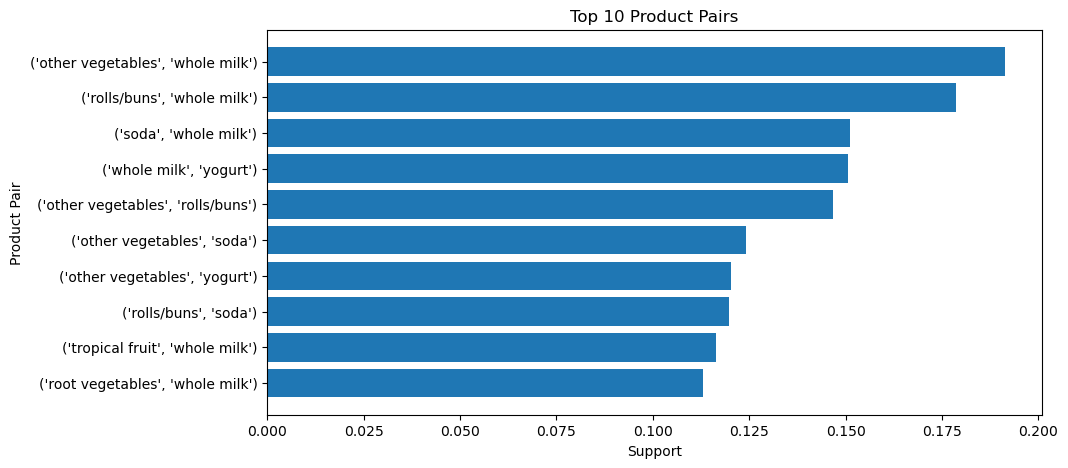

In [9]:
top_pairs = pair_support_df.head(10)

plt.figure(figsize=(10,5))
plt.barh(top_pairs['Item_Pair'].astype(str), top_pairs['Support'])
plt.xlabel("Support")
plt.ylabel("Product Pair")
plt.title("Top 10 Product Pairs")
plt.gca().invert_yaxis()
plt.show()


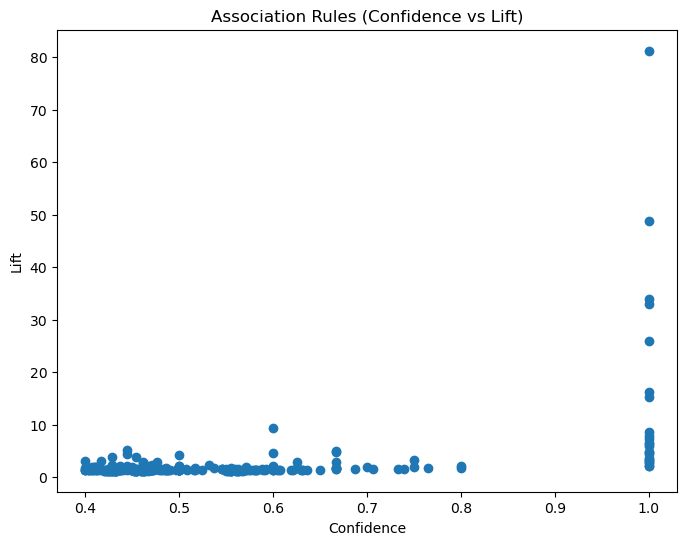

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(strong_rules['Confidence'], strong_rules['Lift'])
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Association Rules (Confidence vs Lift)")
plt.show()


In [11]:
import os
print(os.getcwd())


c:\Users\Anvesh Bajirao\OneDrive\Groceries_dataset.csv


In [13]:
item_support_df.to_csv("item_support.csv", index=False)
pair_support_df.to_csv("pair_support.csv", index=False)
strong_rules.to_csv("association_rules.csv", index=False)


In [15]:
print(item_support_df.head())
print(pair_support_df.head())
print(strong_rules.head())


                Item   Support
5         whole milk  0.458184
20  other vegetables  0.376603
11        rolls/buns  0.349666
10              soda  0.313494
2             yogurt  0.282966
                          Item_Pair   Support
106  (other vegetables, whole milk)  0.191380
58         (rolls/buns, whole milk)  0.178553
44               (soda, whole milk)  0.151103
21             (whole milk, yogurt)  0.150590
207  (other vegetables, rolls/buns)  0.146742
                  Antecedent        Consequent   Support  Confidence  \
10668  preservation products             soups  0.000257         1.0   
12124        kitchen utensil     roll products  0.000257         1.0   
12121        kitchen utensil       canned fish  0.000257         1.0   
12106        kitchen utensil             pasta  0.000257         1.0   
12114        kitchen utensil  processed cheese  0.000257         1.0   

            Lift  
10668  81.208333  
12124  48.725000  
12121  33.895652  
12106  33.033898  
12114  25.

In [16]:
item_support_df = pd.DataFrame(
    item_support.items(),
    columns=['Item', 'Support']
).sort_values(by='Support', ascending=False)


In [17]:
pair_support_df = pd.DataFrame(
    pair_support.items(),
    columns=['Item_Pair', 'Support']
).sort_values(by='Support', ascending=False)


In [18]:
strong_rules = rules_df[
    (rules_df['Confidence'] >= 0.4) &
    (rules_df['Lift'] >= 1.2)
].sort_values(by='Lift', ascending=False)


In [19]:
item_support_df.to_csv("item_support.csv", index=False)
pair_support_df.to_csv("pair_support.csv", index=False)
strong_rules.to_csv("association_rules.csv", index=False)


In [21]:
item_support_df.to_csv(
    r"C:\Users\Anvesh Bajirao\Desktop\item_support.csv",
    index=False
)

pair_support_df.to_csv(
    r"C:\Users\Anvesh Bajirao\Desktop\pair_support.csv",
    index=False
)

strong_rules.to_csv(
    r"C:\Users\Anvesh Bajirao\Desktop\association_rules.csv",
    index=False
)


In [22]:
pd.read_csv("item_support.csv").head()


,Item,Support
0,whole milk,0.458184
1,other vegetables,0.376603
2,rolls/buns,0.349666
3,soda,0.313494
4,yogurt,0.282966
